In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("csvs/merged-df.csv")

In [3]:
sch_indep = ["grade9", "only_hs"]
per_indep = ["ell_percent", "sped_percent","asian_per",
             "black_per", "hispanic_per","white_per"]
num_indep = ["ell_num", "sped_num", "asian_num",
             "black_num","hispanic_num", "white_num"]

In [4]:
display(df.shape)
df["grad_per"]=df["Toal Grads #"]/df["grade9"]*100
awkdf = df[df["grad_per"]>=100]
df=df[df["grad_per"]<=100]
display(df.shape)

(2736, 49)

(2566, 50)

In [5]:
awkdf.describe()

,Unnamed: 0,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high,total_students,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,grad_per
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1173.813559,2008.519774,139.932203,102.141243,72.270056,23.496271,33.316384,415.435028,0.0,0.564972,0.604520,0.785311,0.621469,0.644068,0.604520,7.988701,8.485876,8.045198,75.988701,122.593220,104.661017,83.847458,45.463277,8.531638,27.418079,7.333898,68.395480,10.117514,114.429379,38.092090,134.350282,36.207345,90.892655,13.952542,192.050847,45.226554,223.384181,54.773446,0.129944,415.435028,3.259887,0.564972,0.005650,0.005650,24.519774,0.870056,0.141243,780.209124
std,876.802426,1.968763,147.627818,128.263965,23.367116,29.498562,35.340530,551.792119,0.0,7.516460,8.042612,10.447880,8.268106,8.568765,8.042612,26.237332,26.160802,25.000186,126.481718,164.350559,148.172344,129.002750,136.389483,20.364740,43.796862,5.719353,153.376881,15.359883,97.706348,26.534278,171.940831,22.472463,226.155555,17.849106,278.628403,7.427730,278.241739,7.427730,0.337195,551.792119,43.369976,7.516460,0.075165,0.075165,75.975855,0.337195,0.395061,2673.227743
min,36.000000,2005.000000,31.000000,17.000000,29.800000,0.000000,0.000000,55.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,8.000000,4.000000,0.000000,0.000000,29.000000,25.300000,24.000000,32.800000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,369.000000,2007.000000,80.000000,47.000000,50.900000,0.000000,0.000000,176.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,58.000000,35.000000,28.000000,1.000000,0.400000,7.000000,2.900000,2.000000,0.800000,49.000000,18.900000,41.000000,14.800000,3.000000,1.000000,78.000000,40.500000,93.000000,49.600000,0.000000,176.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,104.477612
50%,1104.000000,2009.000000,104.000000,72.000000,72.500000,0.000000,20.200000,253.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,87.000000,68.000000,59.000000,4.000000,1.800000,16.000000,6.900000,8.000000,3.200000,78.000000,33.600000,82.000000,32.800000,11.000000,5.100000,127.000000,45.800000,136.000000,54.200000,0.000000,253.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,123.684211
75%,1901.000000,2010.000000,135.000000,109.000000,97.400000,56.100000,70.300000,460.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,123.000000,107.000000,95.000000,13.000000,5.500000,30.000000,10.300000,47.000000,13.400000,147.000000,44.900000,137.000000,55.700000,53.000000,24.100000,207.000000,50.400000,259.000000,59.500000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,257.142857
max,2728.000000,2011.000000,1027.000000,906.000000,100.000000,91.400000,100.000000,3778.000000,0.0,100.000000,107.000000,139.000000,110.000000,114.000000,107.000000,186.000000,176.000000,146.000000,

In [7]:
independents = sch_indep+per_indep+num_indep
x_mega_train, x_holdout, y_mega_train, y_holdout = train_test_split(df[independents],
                                                    df["grad_per"],
                                                    test_size=0.1)
x_train, x_test, y_train, y_test = train_test_split(x_mega_train,
                                                    y_mega_train,
                                                    test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(x_train)

#transform the x data
x_train_s = pd.DataFrame(data=scaler.transform(x_train), columns=x_train.columns)
x_test_s = pd.DataFrame(data=scaler.transform(x_test), columns=x_test.columns)


In [52]:
lm_grad = LinearRegression()

lm_grad.fit(x_train_s,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
basic_y_prediction = lm_grad.predict(x_test_s)

basic_rmse = np.sqrt(metrics.mean_squared_error(y_test, basic_y_prediction))
print("basic rmse", basic_rmse)

basic rmse 15.134518944549052


In [55]:
lm_grad.coef_

array([-21.594568  ,  -0.90807129,  -2.75919048,  -7.20986371,
         2.64931982,  -1.88993293,  -0.47187343,   3.10175135,
        -1.77207608,   0.06499626,   7.30070425,   4.22326789,
         6.95623028,   5.44670709])

In [56]:
df[independents].describe()

,grade9,only_hs,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,ell_num,sped_num,asian_num,black_num,hispanic_num,white_num
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,262.501559,0.799688,11.606937,12.531411,8.348441,39.179462,43.185581,7.676734,88.424006,96.574435,120.169525,272.538581,317.051832,104.917381
std,313.247771,0.400312,17.710298,6.568832,12.660457,24.771503,23.422725,12.987077,159.025657,110.749858,323.447059,329.817759,376.472404,292.041064
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,101.000000,1.000000,2.600000,8.400000,1.200000,21.725000,21.000000,0.900000,11.000000,30.000000,4.000000,93.000000,98.000000,3.000000
50%,133.000000,1.000000,6.100000,12.800000,2.700000,34.000000,46.400000,2.000000,30.000000,62.000000,13.000000,161.000000,209.000000,9.000000
75%,232.000000,1.000000,12.500000,16.900000,9.000000,53.575000,61.400000,7.600000,74.000000,102.750000,59.750000,333.000000,344.500000,48.000000
max,2005.000000,1.000000,100.000000,45.800000,89.900000,96.500000,100.000000,82.300000,1418.000000,751.000000,3214.000000,3852.000000,2903.000000,3181.000000


In [57]:
from statsmodels.formula.api import ols
colnames = "+".join(filter(lambda x: x not in ["grad_per",
                                               #"lat","long"
                                              ], x_train_s.columns))

full_train=pd.concat([y_train,x_train_s],axis=1).rename({0:"grad_per"},axis=1)
olsstr = "grad_per~"+colnames
lr_model = ols(formula=olsstr, data=full_train).fit()
#full_train

lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               grad_per   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5402
Date:                Sat, 12 Sep 2020   Prob (F-statistic):              0.910
Time:                        22:24:24   Log-Likelihood:                -5499.8
No. Observations:                1251   AIC:                         1.103e+04
Df Residuals:                    1236   BIC:                         1.111e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       57.5506      0.559    102.879      0.000      56.453      58.648
grade9           1.9322      2.312      0.836      0.403      -2.603       6.468
only_hs          0.0023      0.594      0.004      0.997      -1.163       1.168
ell_percent     -0.5917      0.953     -0.621      0.535      -2.461       1.278
sped_percent    -1.6230      0.915     -1.773      0.076      -3.419       0.173
asian_per        0.5248      4.134      0.127      0.899      -7.585       8.634
black_per        2.3171      8.017      0.289      0.773     -13.410      18.045
hispanic_per     2.5097      7.620      0.329      0.742     -12.440      17.460
white_per        1.0449      4.294      0.243      0.808      -7.380       9.470
ell_num          0.6084      1.300      0.468      0.640      -1.942       3.159
sped_num         3.8031      1.901      2.001      0.046       0.074       7.532
asian_num        0.5568      1.180      0.472      0.637      -1.759       2.872
black_num       -2.1770      1.391     -1.566      0.118      -4.905       0.551
hispanic_num    -3.4184      1.817     -1.881      0.060      -6.984       0.147
white_num       -1.6598      1.342     -1.237      0.216      -4.292       0.972
==============================================================================
Omnibus:                       19.000   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.336
Skew:                          -0.006   Prob(JB):                      0.00345
Kurtosis:                       2.534   Cond. No.                         48.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

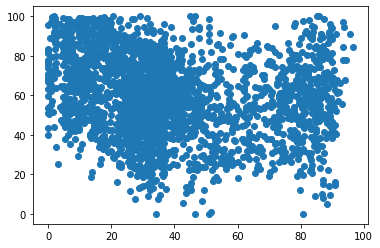

In [38]:
plt.scatter(df["black_per"],df["grad_per"])


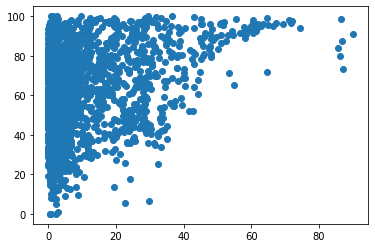

In [39]:
plt.scatter(df["asian_per"],df["grad_per"])

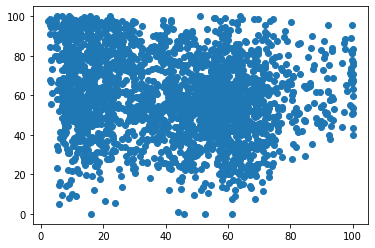

In [40]:
plt.scatter(df["hispanic_per"],df["grad_per"])

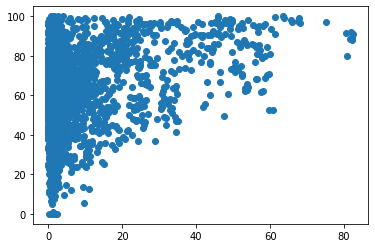

In [41]:
plt.scatter(df["white_per"],df["grad_per"])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


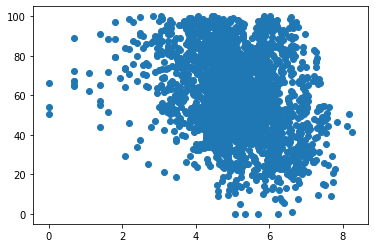

In [50]:
plt.scatter(np.log(df["black_num"]),df["grad_per"])


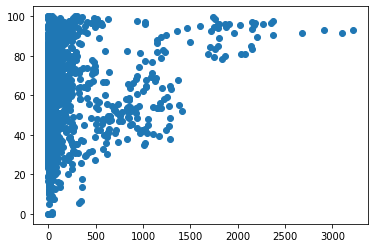

In [43]:
plt.scatter(df["asian_num"],df["grad_per"])

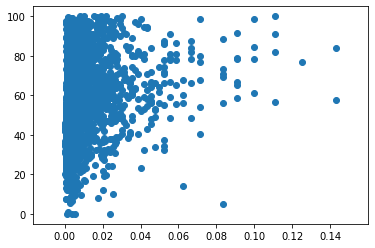

In [44]:
plt.scatter(1/df["hispanic_num"],df["grad_per"])

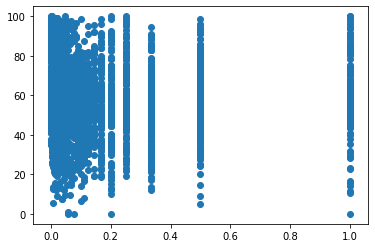

In [45]:
plt.scatter(1/df["white_num"],df["grad_per"])

In [46]:
df["white_num"].nunique()

431

In [47]:
df["black_num"].nunique()
df["hispanic_num"].nunique()

794

In [48]:
df[df["white_num"]<5]

,Unnamed: 0,DBN,schoolyear,Cohort #,Toal Grads #,% of cohort,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,has_junior_high,total_students,true,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,grad_per
93,93,02M303,2005,105,58,65.2,60.0,0.0,114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,20.0,17.5,17.0,14.9,3,2.6,29,25.4,73,64.0,4,3.5,72.0,63.2,42.0,36.8,0,114.0,True,0.0,0.0,0,0,0.0,1,0,50.877193
97,97,02M303,2009,98,66,68.0,0.0,85.9,401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,85.0,69.0,20.0,59.0,14.7,82.0,20.4,8,2.0,125,31.2,261,65.1,3,0.7,202.0,50.4,199.0,49.6,0,401.0,True,0.0,0.0,0,0,0.0,1,0,29.074890
107,107,02M308,2005,67,56,86.2,60.0,0.0,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,1.0,1.2,14.0,16.9,7,8.4,39,47.0,30,36.1,3,3.6,37.0,44.6,46.0,55.4,0,83.0,True,0.0,0.0,0,0,0.0,1,0,67.469880
121,121,02M316,2005,77,59,81.7,60.0,0.0,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0,0.0,1.0,0.9,11.0,10.3,1,0.9,26,24.3,68,63.6,3,2.8,0.0,0.0,107.0,100.0,0,107.0,True,0.0,0.0,0,0,0.0,1,0,55.140187
122,122,02M316,2006,74,60,82.2,73.8,0.0,206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,93.0,0.0,0.0,8.0,3.9,17.0,8.3,7,3.4,72,35.0,111,53.9,3,1.5,0.0,0.0,206.0,100.0,0,206.0,True,0.0,0.0,0,0,0.0,1,0,53.097345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2731,32K556,2007,138,83,65.4,86.6,0.0,458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,121.0,82.0,81.0,108.0,23.6,53.0,11.6,6,1.3,76,16.6,373,81.4,2,0.4,192.0,41.9,266.0,58.1,0,458.0,True,0.0,0.0,0,0,0.0,1,0,47.701149
2732,2732,32K556,2008,110,60,56.1,86.4,0.0,489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,144.0,80.0,89.0,100.0,20.4,75.0,15.3,6,1.2,78,16.0,400,81.8,4,0.8,225.0,46.0,264.0,54.0,0,489.0,True,0.0,0.0,0,0,0.0,1,0,34.090909
2733,2733,32K556,2009,110,80,76.2,0.0,94.4,481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,133.0,108.0,85.0,102.0,21.2,82.0,17.0,5,1.0,81,16.8,391,81.3,2,0.4,245.0,50.9,236.0,49.1,0,481.0,True,0.0,0.0,0,0,0.0,1,0,51.612903
2734,2734,32K556,2010,110,82,81.2,0.0,96.7,500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,109.0,111.0,144.0,101.0,20.2,88.0,17.6,3,0.6,92,18.4,402,80.4,1,0.2,270.0,54.0,230.0,46.0,0,500.0,True,0.0,0.0,0,0,0.0,1,0,60.294118
